In [77]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from scipy.stats import ttest_ind
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('drive/Shared drives/Healthcare_Analytics')

In [4]:
data = pd.read_csv('PCOS_data.csv')
data.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


## Data Cleaning

In [5]:
# checking if data has any missing values or not
data.isna().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [6]:
# impute the mean for Marraige Status (Yrs) and Fast food (Y/N)
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(), inplace = True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mean(), inplace = True)

# I think mode() might be better for categorical var
# data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mode(), inplace = True)
data.isna().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       0
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [7]:
# remove column unnamed: 44
data = data.drop('Unnamed: 44', axis=1)
data.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [8]:
# build correlation matrix to see most correlated variables to PCOS (Y/N)
data.corr()

<ipython-input-8-23ff34df60ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.160834,0.154059,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.160834,0.154059,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199697,0.036433,0.091821,0.036928,...,0.286077,0.377763,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021372,-0.010954,0.045831,0.087382,...,-0.032921,-0.037670,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901688,0.072682,0.019983,0.043614,...,0.063983,0.161964,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006845,0.040825,-0.074339,-0.029459,...,0.061129,0.032416,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.082840,-0.082840,0.199697,0.021372,0.901688,-0.006845,1.000000,0.061328,0.050507,0.061579,...,0.045535,0.159214,-0.080660,0.069737,0.140062,0.143110,0.104425,-0.011736,-0.111427,0.009327
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061328,1.000000,0.047572,-0.023766,...,0.039029,-0.035084,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050507,0.047572,1.000000,0.303804,...,-0.003039,0.059800,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061579,-0.023766,0.303804,1.000000,...,0.029242,0.135143,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


<ipython-input-9-8af2af5a86e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


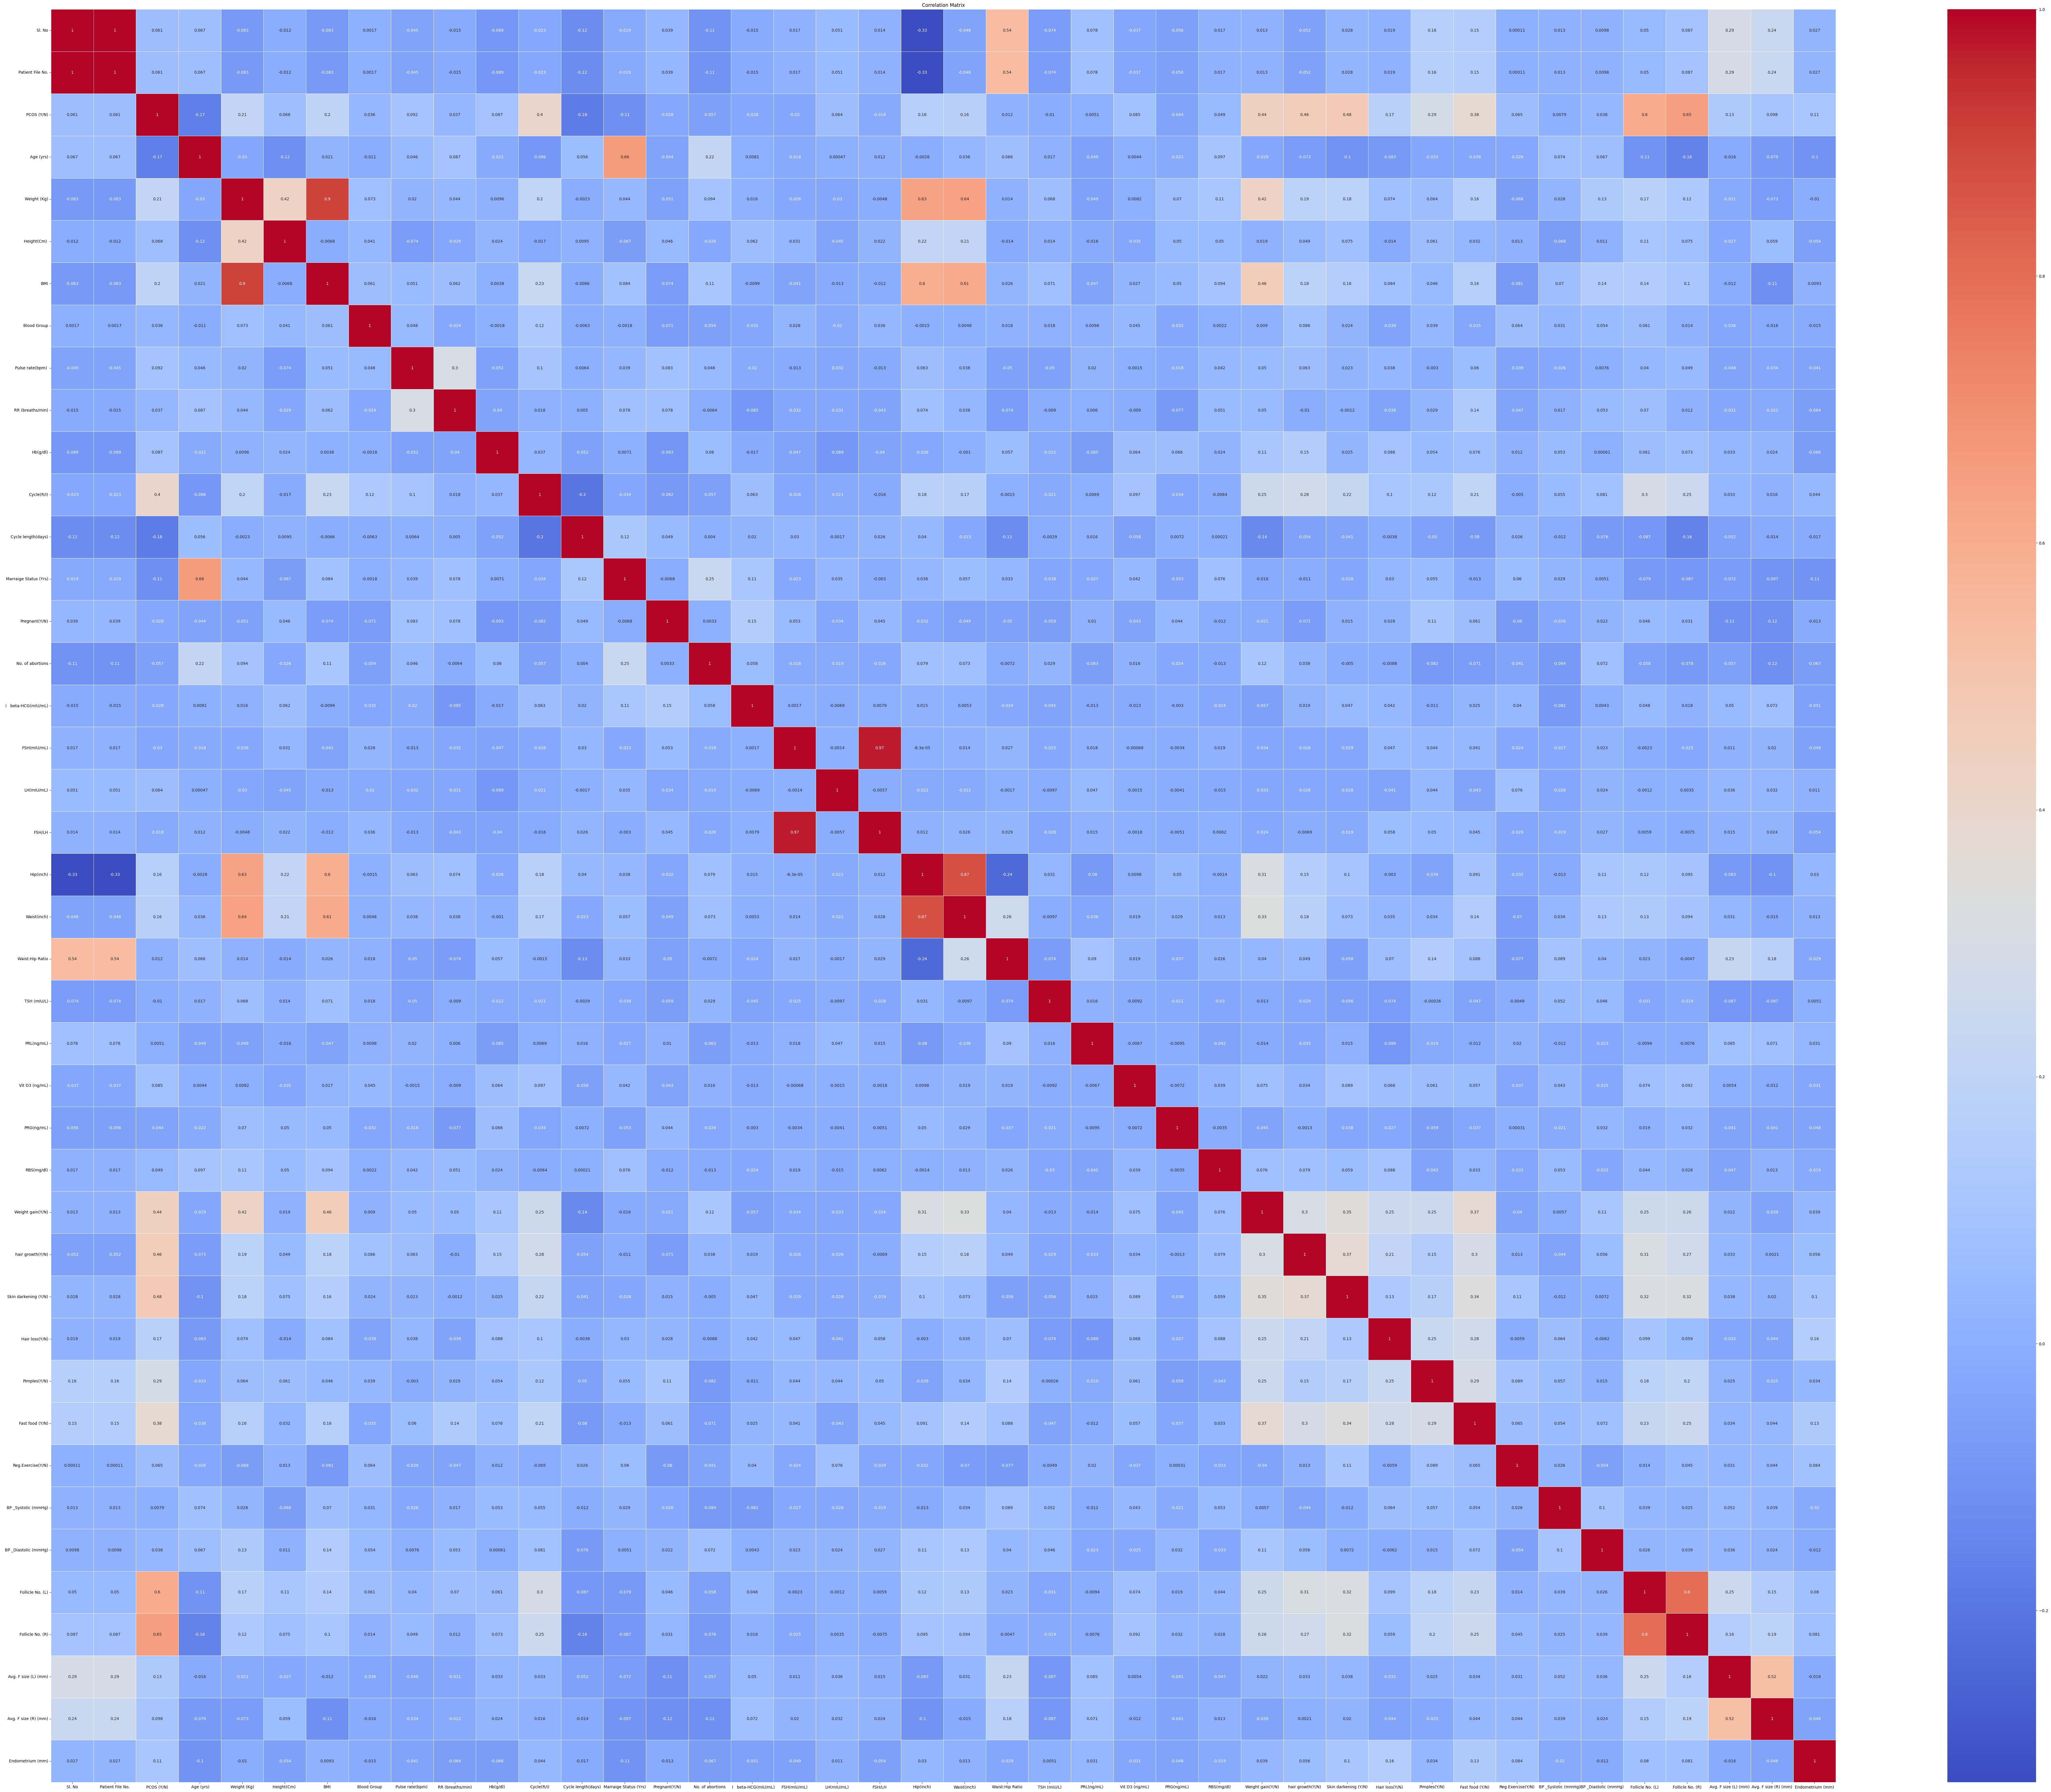

In [9]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
# kurtosis
data.kurt()

<ipython-input-10-0d294b8633b2>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


Sl. No                     -1.200000
Patient File No.           -1.200000
PCOS (Y/N)                 -1.459624
 Age (yrs)                 -0.149186
Weight (Kg)                 1.173608
Height(Cm)                  0.339241
BMI                         0.878245
Blood Group                -0.940341
Pulse rate(bpm)           106.867775
RR (breaths/min)            2.706652
Hb(g/dl)                    0.886342
Cycle(R/I)                 -0.983340
Cycle length(days)          4.325989
Marraige Status (Yrs)       1.878536
Pregnant(Y/N)              -1.764052
No. of abortions           10.189515
  I   beta-HCG(mIU/mL)     58.018670
FSH(mIU/mL)               540.535377
LH(mIU/mL)                540.230408
FSH/LH                    478.846335
Hip(inch)                   0.511998
Waist(inch)                 0.919940
Waist:Hip Ratio            -0.636112
TSH (mIU/L)               143.042209
PRL(ng/mL)                 10.483792
Vit D3 (ng/mL)            270.256691
PRG(ng/mL)                451.532805
R

## Distribution of Highly Correlated Variables (PCOS (Y/N) > 20%)

**Correlation over 20% with PCOS (Y/N):** <br>
Weight (Kg) <br>
Cycle(R/I) <br>
Weight gain(Y/N) <br>
hair growth(Y/N) <br>
Skin darkening(Y/N) <br>
Pimples(Y/N) <br>
Fast food(Y/N) <br>
Follicle No. (L) <br>
Follice No. (R) <br>

In [11]:
data_columns = ['PCOS (Y/N)','Weight (Kg)', 'Cycle(R/I)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Pimples(Y/N)','Fast food (Y/N)','Follicle No. (L)','Follicle No. (R)']
newdataset = data[data_columns]
newdataset.head(5)

,PCOS (Y/N),Weight (Kg),Cycle(R/I),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
0,0,44.6,2,0,0,0,0,1.0,3,3
1,0,65.0,2,0,0,0,0,0.0,3,5
2,1,68.8,2,0,0,0,1,1.0,13,15
3,0,65.0,2,0,0,0,0,0.0,2,2
4,0,52.0,2,0,0,0,0,0.0,3,4


In [12]:
newdataset.corr()

,PCOS (Y/N),Weight (Kg),Cycle(R/I),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
PCOS (Y/N),1.000000,0.211938,0.401644,0.441047,0.464667,0.475733,0.286077,0.377763,0.603346,0.648327
Weight (Kg),0.211938,1.000000,0.200758,0.419333,0.188240,0.180186,0.063983,0.161964,0.173751,0.124290
Cycle(R/I),0.401644,0.200758,1.000000,0.252866,0.276587,0.222516,0.121380,0.205574,0.296518,0.251575
Weight gain(Y/N),0.441047,0.419333,0.252866,1.000000,0.301084,0.350681,0.252334,0.374103,0.254181,0.255667
hair growth(Y/N),0.464667,0.188240,0.276587,0.301084,1.000000,0.373909,0.153487,0.297350,0.308966,0.273203
Skin darkening (Y/N),0.475733,0.180186,0.222516,0.350681,0.373909,1.000000,0.165867,0.337580,0.318262,0.321459
Pimples(Y/N),0.286077,0.063983,0.121380,0.252334,0.153487,0.165867,1.000000,0.293059,0.180018,0.201054
Fast food (Y/N),0.377763,0.161964,0.205574,0.374103,0.297350,0.337580,0.293059,1.000000,0.227305,0.248760
Follicle No. (L),0.603346,0.173751,0.296518,0.254181,0.308966,0.318262,0.180018,0.227305,1.000000,0.799572
Follicle No. (R),0.648327,0.124290,0.251575,0.255667,0.273203,0.321459,0.201054,0.248760,0.799572,1.000000


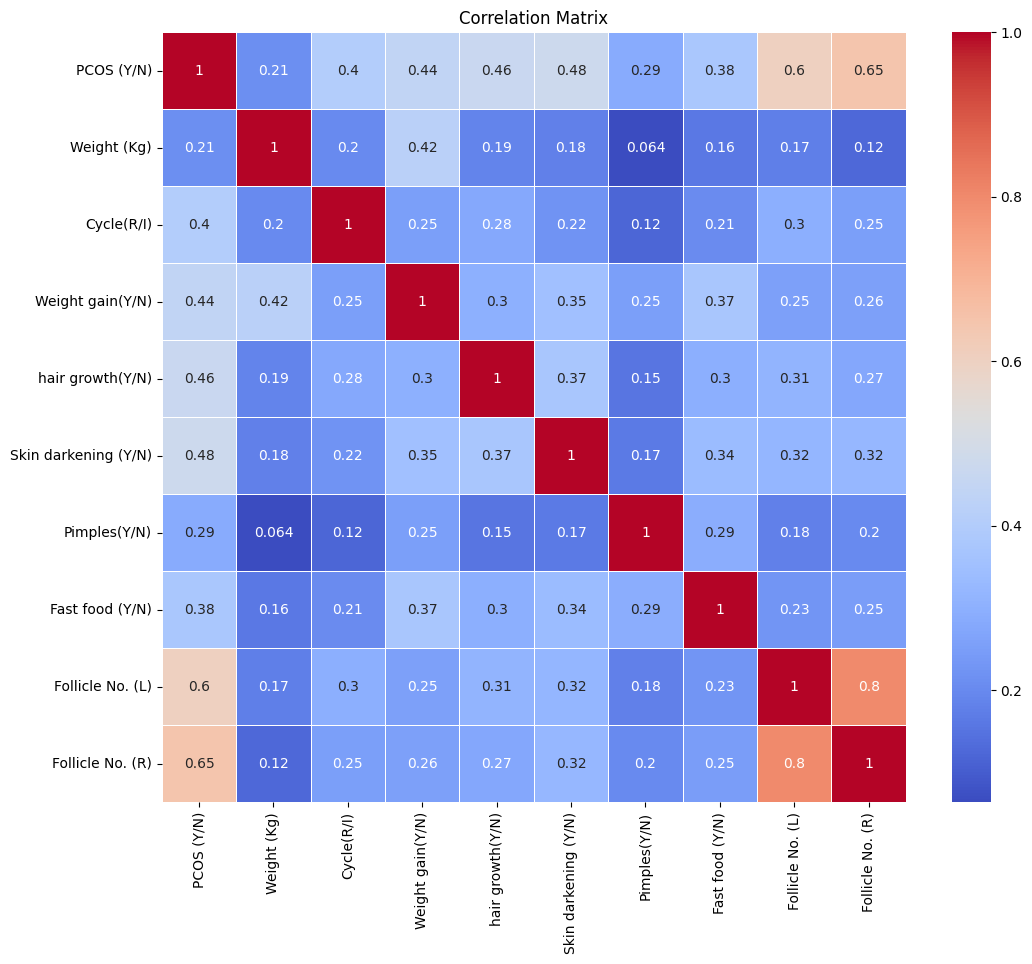

In [13]:
correlation_matrix = newdataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

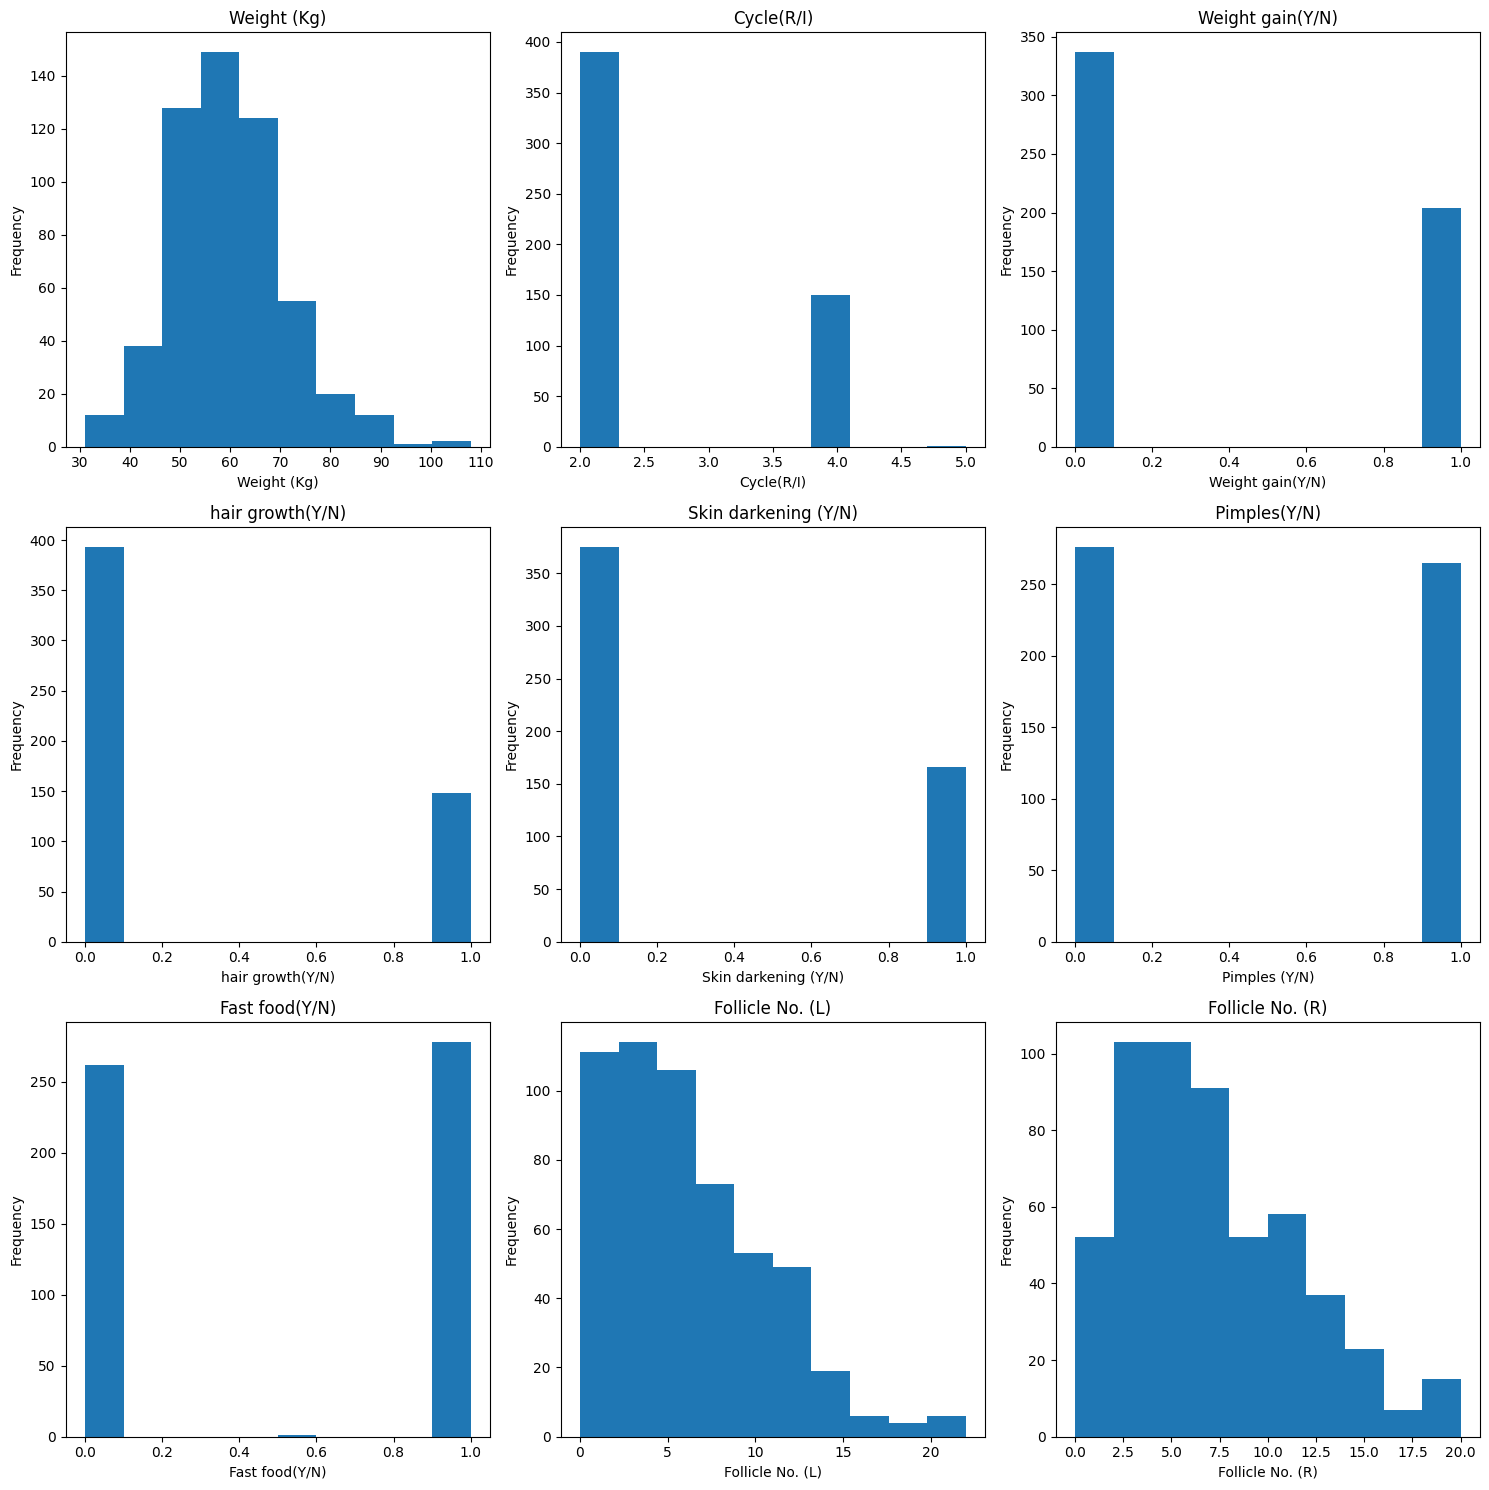

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs[0, 0].hist(data['Weight (Kg)'])
axs[0, 0].set_xlabel("Weight (Kg)")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("Weight (Kg)")

axs[0, 1].hist(data['Cycle(R/I)'])
axs[0, 1].set_xlabel("Cycle(R/I)")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("Cycle(R/I)")

axs[0, 2].hist(data['Weight gain(Y/N)'])
axs[0, 2].set_xlabel("Weight gain(Y/N)")
axs[0, 2].set_ylabel("Frequency")
axs[0, 2].set_title("Weight gain(Y/N)")

axs[1, 0].hist(data['hair growth(Y/N)'])
axs[1, 0].set_xlabel("hair growth(Y/N)")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title("hair growth(Y/N)")

axs[1, 1].hist(data['Skin darkening (Y/N)'])
axs[1, 1].set_xlabel("Skin darkening (Y/N)")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("Skin darkening (Y/N)")

axs[1, 2].hist(data['Pimples(Y/N)'])
axs[1, 2].set_xlabel("Pimples (Y/N)")
axs[1, 2].set_ylabel("Frequency")
axs[1, 2].set_title(" Pimples(Y/N) ")

axs[2, 0].hist(data['Fast food (Y/N)'])
axs[2, 0].set_xlabel("Fast food(Y/N)")
axs[2, 0].set_ylabel("Frequency")
axs[2, 0].set_title("Fast food(Y/N)")

axs[2, 1].hist(data['Follicle No. (L)'])
axs[2, 1].set_xlabel("Follicle No. (L)")
axs[2, 1].set_ylabel("Frequency")
axs[2, 1].set_title("Follicle No. (L)")

axs[2, 2].hist(data['Follicle No. (R)'])
axs[2, 2].set_xlabel("Follicle No. (R)")
axs[2, 2].set_ylabel("Frequency")
axs[2, 2].set_title("Follicle No. (R)")

plt.tight_layout()
plt.show()

### feature engineering (not sure whether you guys wanna do it, I'll keep it here first)

In [82]:
data = data[data['AMH(ng/mL)']!='a']
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype('float')
data.loc[data['II    beta-HCG(mIU/mL)'] == '1.99.', 'II    beta-HCG(mIU/mL)'] = '1.99'
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].astype('float')
X = data[data.columns[3:]]
Y = data['PCOS (Y/N)']

In [92]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

nfeatures = len(X.columns)
clf = RandomForestClassifier(n_estimators=10,random_state=42)
sfs = SFS(clf,k_features=8,forward=True,verbose=0,cv=4,n_jobs=1) # use for forward selection
sfs.fit(X,Y)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_estimators=10,
                                                           random_state=42),
                          k_features=(8, 8), scoring='accuracy')

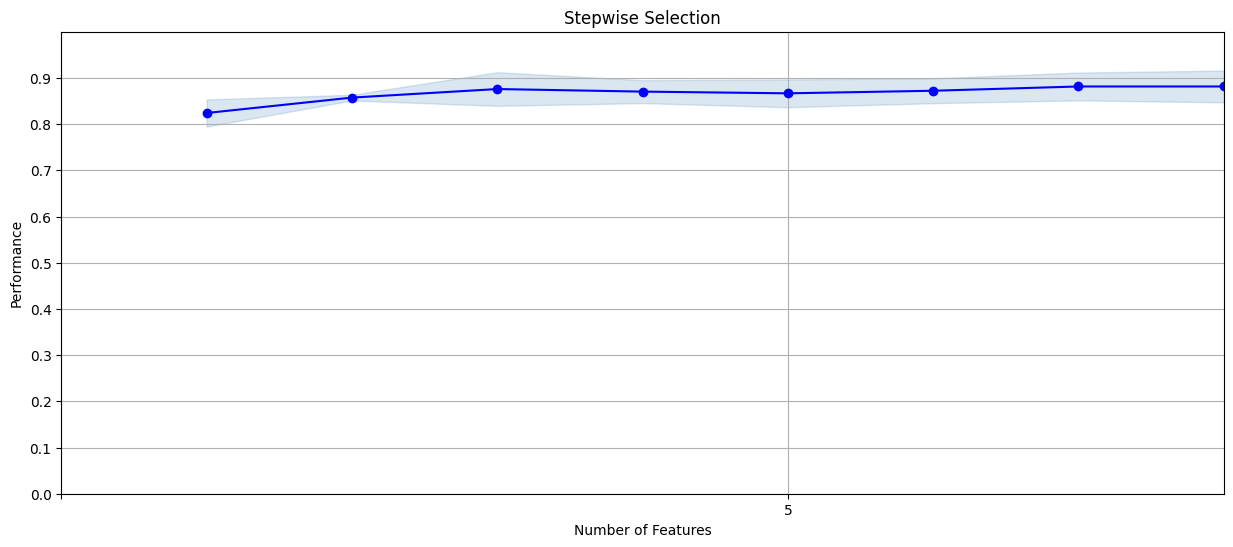

In [93]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev', figsize=(15, 6))
plt.xticks(np.arange(0, len(X.columns), step=5))
plt.yticks(np.arange(0,1,step=.1))
plt.ylim([0., 1])
plt.xlim(0,8)
plt.title('Stepwise Selection')
plt.grid()
plt.savefig('performance_nvars.png')
plt.show()

In [94]:
vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
ordered_vars_FS = vars_FS.copy()
for i in range(len(ordered_vars_FS)):
    ordered_vars_FS.loc[i+1,'add variables in this order'] = int(i+1)
    if i+1 == 1:
        ordered_vars_FS.loc[i+1,'variable name'] = (list(ordered_vars_FS.loc[i+1,'feature_names'])[0])
    else:
        ordered_vars_FS.loc[i+1,'variable name'] = (list(set(ordered_vars_FS.loc[i+1,'feature_names']) - set(ordered_vars_FS.loc[i,'feature_names'])))
        ordered_vars_FS.loc[i+1,'variable name'] = ordered_vars_FS.loc[i+1,'variable name'][0]

ordered_vars_FS

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,add variables in this order,variable name
1,"(37,)","[0.7851851851851852, 0.8444444444444444, 0.859...",0.824074,"(Follicle No. (R),)",0.04703,0.029339,0.016939,1.0,Follicle No. (R)
2,"(32, 37)","[0.8666666666666667, 0.8518518518518519, 0.851...",0.857407,"(Fast food (Y/N), Follicle No. (R))",0.009845,0.006142,0.003546,2.0,Fast food (Y/N)
3,"(28, 32, 37)","[0.9037037037037037, 0.9037037037037037, 0.881...",0.875926,"(hair growth(Y/N), Fast food (Y/N), Follicle N...",0.058397,0.03643,0.021033,3.0,hair growth(Y/N)
4,"(12, 28, 32, 37)","[0.8962962962962963, 0.8740740740740741, 0.881...",0.87037,"(No. of abortions, hair growth(Y/N), Fast food...",0.039826,0.024845,0.014344,4.0,No. of abortions
5,"(12, 28, 29, 32, 37)","[0.8814814814814815, 0.8592592592592593, 0.903...",0.866667,"(No. of abortions, hair growth(Y/N), Skin dark...",0.048232,0.030089,0.017372,5.0,Skin darkening (Y/N)
6,"(12, 28, 29, 31, 32, 37)","[0.8814814814814815, 0.8740740740740741, 0.903...",0.872222,"(No. of abortions, hair growth(Y/N), Skin dark...",0.04312,0.0269,0.015531,6.0,Pimples(Y/N)
7,"(12, 28, 29, 31, 32, 37, 38)","[0.8962962962962963, 0.9037037037037037, 0.896...",0.881481,"(No. of abortions, hair growth(Y/N), Skin dark...",0.048232,0.030089,0.017372,7.0,Avg. F size (L) (mm)
8,"(12, 26, 28, 29, 31, 32, 37, 38)","[0.8962962962962963, 0.9037037037037037, 0.903...",0.881481,"(No. of abortions, RBS(mg/dl), hair growth(Y/N...",0.055057,0.034347,0.01983,8.0,RBS(mg/dl)


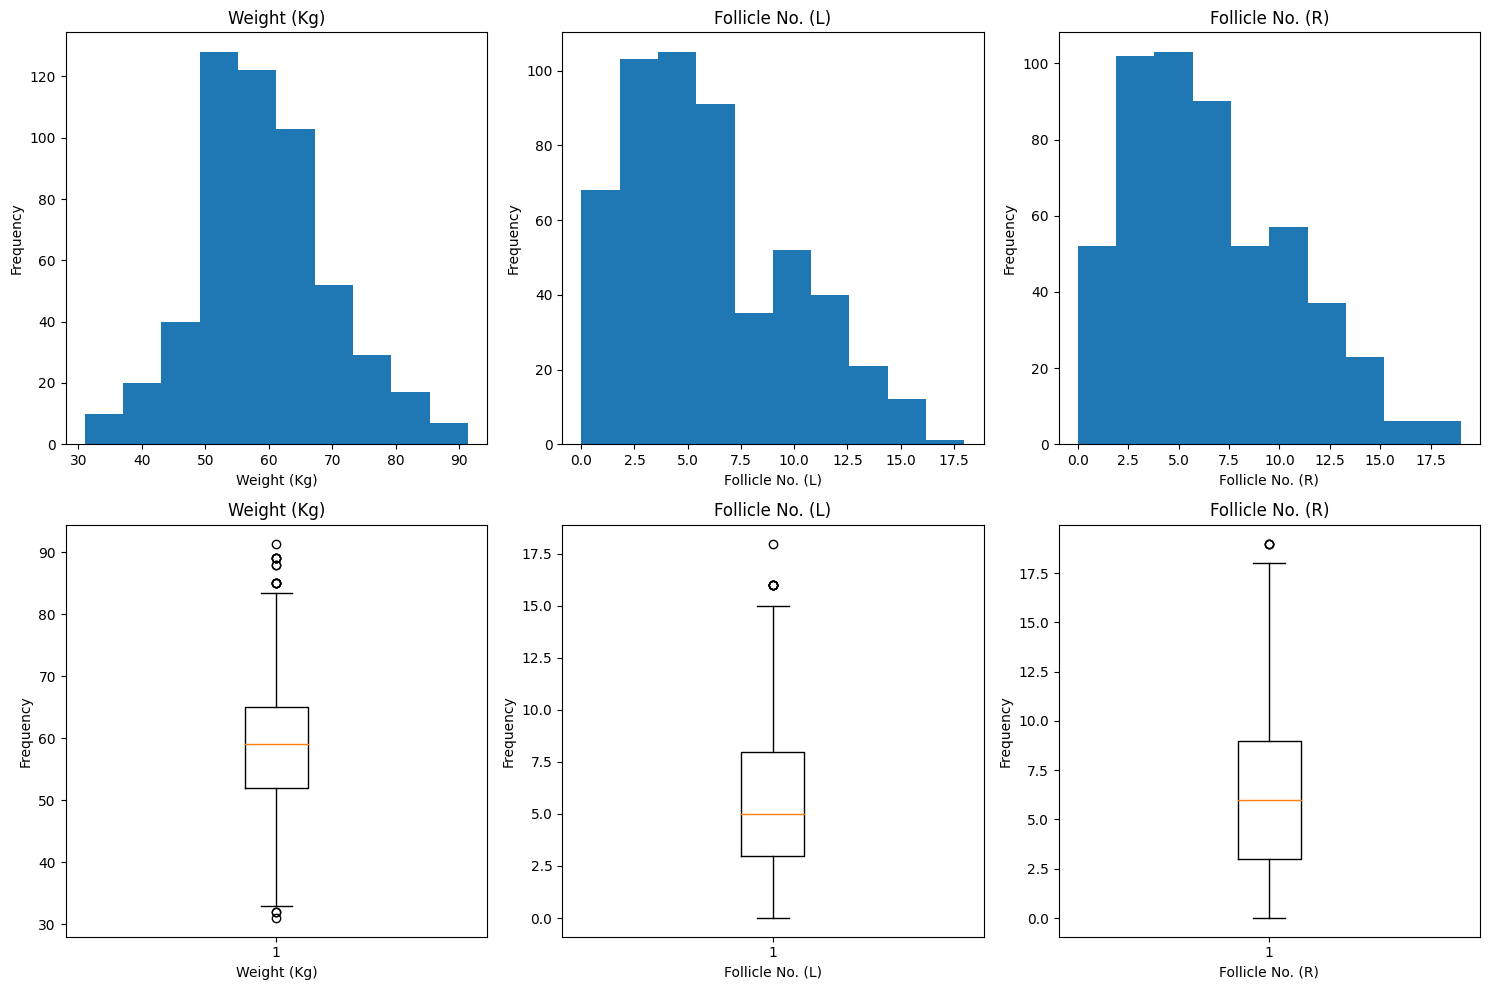

In [15]:
col = ['Weight (Kg)', 'Follicle No. (L)', 'Follicle No. (R)']

z_scores = np.abs((newdataset[col] - newdataset[col].mean()) / newdataset[col].std())
outliers = newdataset[(z_scores > 3).any(axis=1)] # drop the outliers from the new dataset
newdataset = newdataset.drop(outliers.index)

fig, axs = plt.subplots(2,3, figsize = (15,10))

axs[0, 0].hist(newdataset['Weight (Kg)'])
axs[0, 0].set_xlabel("Weight (Kg)")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("Weight (Kg)")

axs[0, 1].hist(newdataset['Follicle No. (L)'])
axs[0, 1].set_xlabel("Follicle No. (L)")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("Follicle No. (L)")

axs[0, 2].hist(newdataset['Follicle No. (R)'])
axs[0, 2].set_xlabel("Follicle No. (R)")
axs[0, 2].set_ylabel("Frequency")
axs[0, 2].set_title("Follicle No. (R)")


axs[1, 0].boxplot(newdataset['Weight (Kg)'])
axs[1, 0].set_xlabel("Weight (Kg)")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title("Weight (Kg)")

axs[1, 1].boxplot(newdataset['Follicle No. (L)'])
axs[1, 1].set_xlabel("Follicle No. (L)")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("Follicle No. (L)")

axs[1, 2].boxplot(newdataset['Follicle No. (R)'])
axs[1, 2].set_xlabel("Follicle No. (R)")
axs[1, 2].set_ylabel("Frequency")
axs[1, 2].set_title("Follicle No. (R)")

plt.tight_layout()
plt.show()

## models

In [16]:
# put all the features here in this list
features = ['Weight (Kg)', 'Cycle(R/I)','Weight gain(Y/N)',
            'hair growth(Y/N)','Skin darkening (Y/N)','Pimples(Y/N)',
            'Fast food (Y/N)','Follicle No. (L)','Follicle No. (R)']

In [17]:
X_cls = data[features]

y_cls = data[['PCOS (Y/N)']]

kfolds_classification = KFold(n_splits=10, shuffle=True, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, GridSearchCV

def classification_model_f1(model_type='random_forest', features=None):

    # Define the models and parameter grids
    if model_type == 'random_forest':
        model = RandomForestClassifier()
        param_grid = {
            'n_estimators': [5, 10, 20],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 3]
        }
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier(random_state=3)
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 3, 5],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    else:
        best_model = DecisionTreeClassifier(random_state=240)

    train_precision = []
    train_recall = []
    train_f1 = []

    cv_precision = []
    cv_recall = []
    cv_f1 = []

    kfolds_classification = KFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, test_index in kfolds_classification.split(X_cls, y_cls):
        X_train = X_cls.iloc[train_index, :][features]
        y_train = y_cls.iloc[train_index]
        X_test = X_cls.iloc[test_index, :][features]
        y_test = y_cls.iloc[test_index]

        # Grid Search with F1 as scoring metric
        if model_type != 'benchmark':
          grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5, n_jobs=-1)
          grid_search.fit(X_train, y_train)
          best_model = grid_search.best_estimator_
        else:
          best_model.fit(X_train, y_train)

        # Predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Metrics
        precision_train = precision_score(y_train, y_train_pred)
        precision_test = precision_score(y_test, y_test_pred)
        recall_train = recall_score(y_train, y_train_pred)
        recall_test = recall_score(y_test, y_test_pred)
        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)

        train_precision.append(precision_train)
        cv_precision.append(precision_test)
        train_recall.append(recall_train)
        cv_recall.append(recall_test)
        train_f1.append(f1_train)
        cv_f1.append(f1_test)


    print("Train F1 score using 10-fold CV:\n{}\n".format(train_f1))
    print("Test F1 score using 10-fold CV:\n{}\n".format(cv_f1))
    print("Mean of F1 score using 10-fold CV: {} and {}\n".format(np.mean(train_f1), np.mean(cv_f1)))

    final_model = best_model.fit(X_cls[features], y_cls)
    return final_model,train_f1,cv_f1,cv_precision,cv_recall


In [67]:
m,train_f1,cv_f1,cv_precision,cv_recall = classification_model_f1(model_type='decision_tree', features=features)

Train F1 score using 10-fold CV:
[0.9038461538461539, 0.8807339449541284, 0.870748299319728, 0.89171974522293, 0.9009009009009009, 0.8932038834951457, 0.9108910891089108, 0.9067524115755626, 0.90625, 0.872611464968153]

Test F1 score using 10-fold CV:
[0.7272727272727272, 0.8148148148148148, 0.7692307692307692, 0.9090909090909091, 0.8421052631578948, 0.9047619047619048, 0.7368421052631577, 0.8333333333333333, 0.8823529411764706, 0.7428571428571428]

Mean of F1 score using 10-fold CV: 0.8937657893391615 and 0.8162661910959124



In [75]:
np.mean(cv_precision),np.mean(cv_recall)

(0.8608817244846655, 0.7779498936735779)

In [72]:
# benchmark prediction
tree_cls_model,b_train_f1,b_f1,b_precision,b_recall = classification_model_f1(model_type = 'benchmark',features = features)

Train F1 score using 10-fold CV:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Test F1 score using 10-fold CV:
[0.7428571428571428, 0.75, 0.8, 0.7999999999999999, 0.6956521739130435, 0.8717948717948718, 0.7567567567567567, 0.7647058823529413, 0.7027027027027027, 0.6111111111111112]

Mean of F1 score using 10-fold CV: 1.0 and 0.7495580641488571



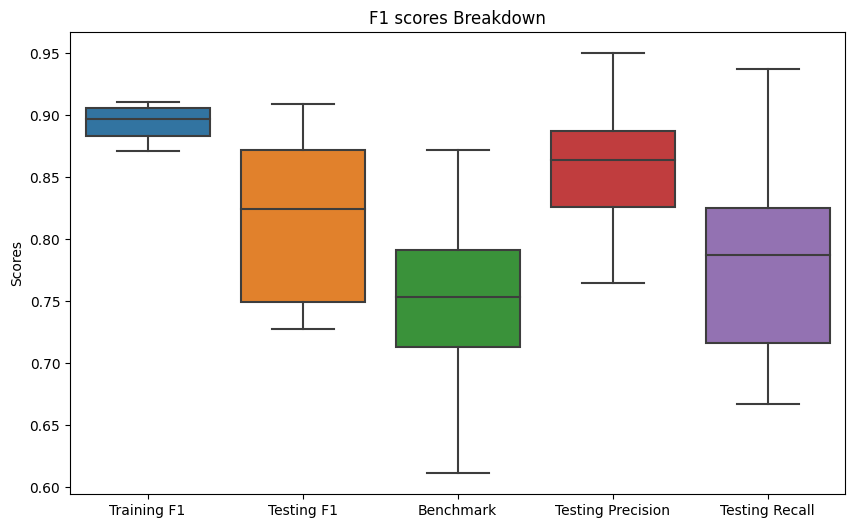

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

data_to_plot = [train_f1, cv_f1,b_f1,cv_precision,cv_recall,]
labels = ['Training F1', 'Testing F1','Benchmark','Testing Precision','Testing Recall']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.xticks([0, 1,2,3,4], labels)
plt.title('F1 scores Breakdown')
plt.ylabel('Scores')
plt.show()


In [74]:
list1 = b_f1
list2 = cv_f1

t_stat, p_value = ttest_ind(list1, list2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -2.1305326553041
p-value: 0.0471744435142812


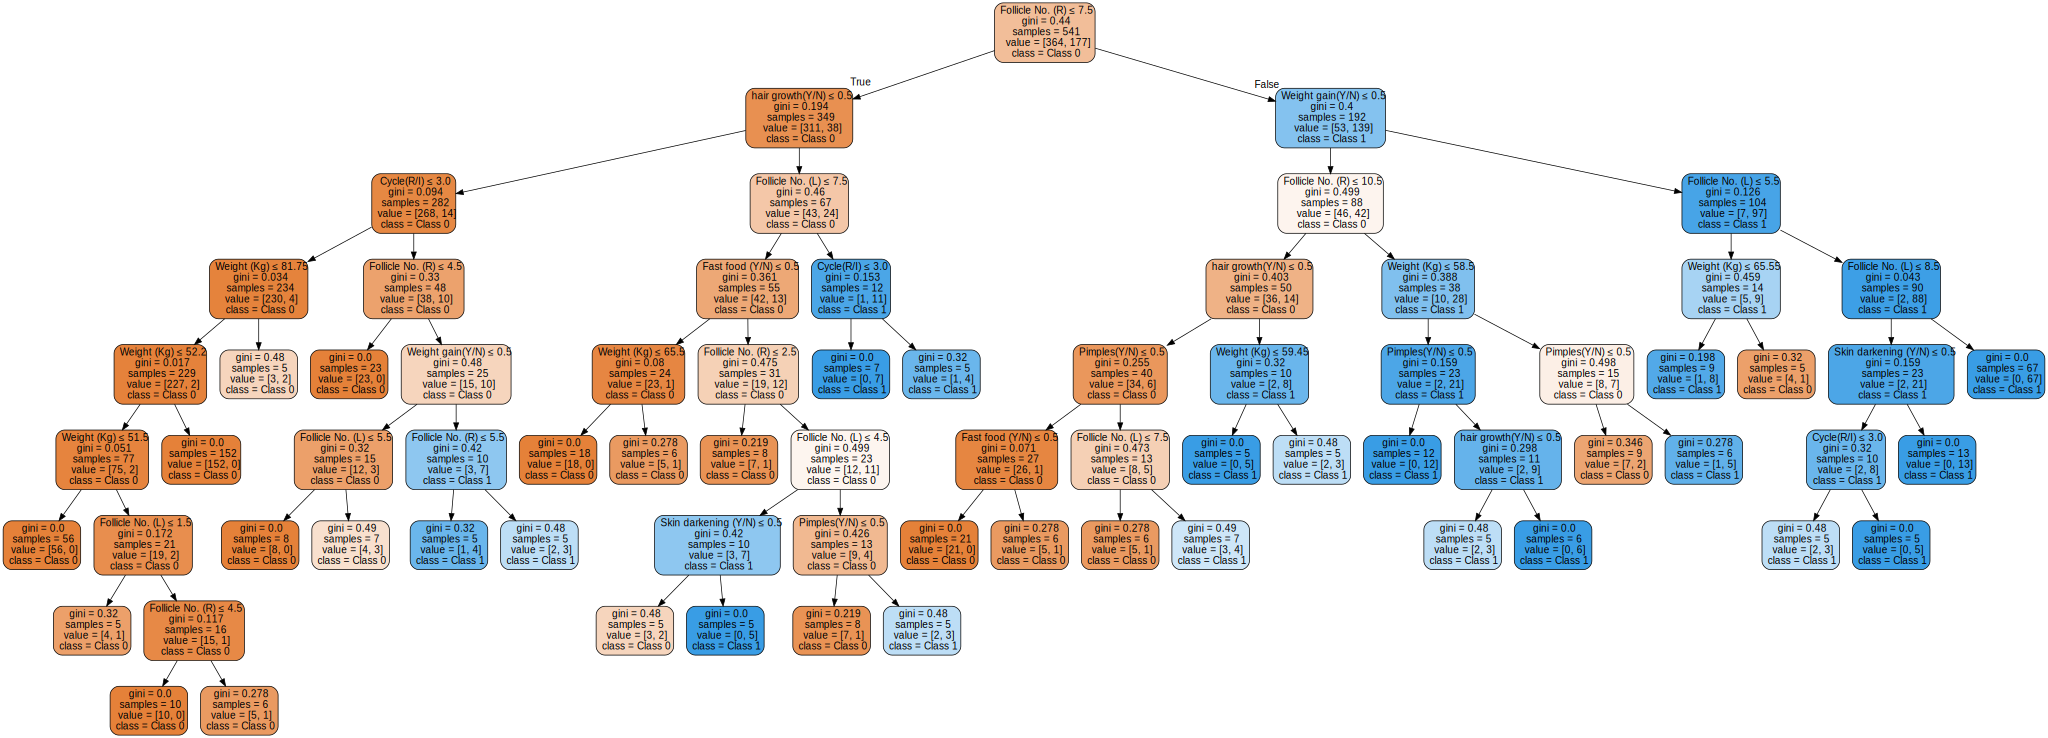

In [95]:
dot_data = export_graphviz(m, out_file=None,
                           feature_names=features,
                           class_names=['Class 0', 'Class 1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph